# Chapter 12: The Polling case study

In [1]:
import pandas as pd
import seaborn as sns

## Get the data and display it

In [2]:
# define the path and filename for the CSV file
poll_path = 'http://projects.fivethirtyeight.com/general-model/'
filename = 'president_general_polls_2016.csv'

In [3]:
# save CSV file
from urllib import request    
request.urlretrieve(poll_path+filename, filename=filename)

('president_general_polls_2016.csv',
 <http.client.HTTPMessage at 0x17657292190>)

In [4]:
# read the CSV file
polls = pd.read_csv(filename)

In [5]:
polls.head(2)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016


In [6]:
polls.tail(2)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
12622,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,...,49.57558,39.96954,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,09:14:14 8 Nov 2016
12623,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,6/9/2016,6/12/2016,Marquette University,A,...,46.40999,39.19839,NaN,NaN,NaN,https://law.marquette.edu/poll/2016/06/15/new-...,44341,66966,6/15/16,09:14:14 8 Nov 2016


In [7]:
with pd.option_context(
        'display.max_rows', 2,
        'display.max_columns', None):
    display(polls)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.0,43.0,4.0,NaN,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,6/9/2016,6/12/2016,Marquette University,A,666.0,lv,0.000000,46.0,37.0,NaN,NaN,46.40999,39.19839,NaN,NaN,NaN,https://law.marquette.edu/poll/2016/06/15/new-...,44341,66966,6/15/16,09:14:14 8 Nov 2016


## Clean the data

### Examine the data

In [8]:
polls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [9]:
polls.nunique(dropna=False)
# The number of unique values for the state column shows that there might be a problem. 
# There should be 51 columns (U.S. + 50 states).
# We should investigate and fix.

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  11
samplesize           1767
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       585
rawpoll_mcmullin       17
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6630
adjpoll_mcmullin       58
multiversions           2
url                  1305
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [10]:
polls.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

### Drop columns with only one value

In [11]:
polls.drop(columns=['cycle','branch','matchup','forecastdate'], inplace=True)

### Keep only the rows with "now-cast" in the type column and then drop that column

In [12]:
polls = polls.query('type=="now-cast"')
polls.head()

,type,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,now-cast,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,now-cast,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,now-cast,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,now-cast,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,now-cast,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


In [13]:
polls.drop(columns=['type'], inplace=True)
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


### Keep rows with "rv" or "lv" in the population column

In [14]:
polls.query('population !="lv" & population != "rv"')     # just 63 rows

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4445,Kentucky,10/26/2016,10/28/2016,Google Consumer Surveys,B,1004.0,a,1.564146,24.8,38.2,...,31.09015,46.76224,5.711549,NaN,NaN,http://www.babbagecofounder.com/2016/11/01/pau...,48192,75472,11/3/16,09:24:53 8 Nov 2016
4567,Colorado,10/17/2016,10/24/2016,University of Colorado,NaN,1004.0,a,0.997148,44.0,34.0,...,44.80798,39.04050,7.293289,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48106,75320,11/2/16,09:24:53 8 Nov 2016
4807,Montana,10/3/2016,10/10/2016,Montana State University Billings,B+,590.0,a,0.468685,27.0,43.0,...,30.05575,47.73109,4.988388,NaN,NaN,http://www.msubillings.edu/urelations/releases...,47466,74253,10/25/16,09:24:53 8 Nov 2016
4830,Kentucky,10/12/2016,10/14/2016,Google Consumer Surveys,B,816.0,a,0.427879,28.4,31.8,...,34.83303,42.26878,2.971252,NaN,NaN,http://www.babbagecofounder.com/2016/10/18/pau...,47047,73577,10/18/16,09:24:53 8 Nov 2016
4831,Utah,10/9/2016,10/9/2016,Google Consumer Surveys,B,500.0,a,0.427705,22.8,22.6,...,29.44325,33.08569,5.624236,18.89288,NaN,https://medium.com/@alexanderpower/new-utah-po...,46948,73436,10/17/16,09:24:53 8 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,Missouri,7/11/2016,7/12/2016,Public Policy Polling,B+,959.0,v,0.000000,36.0,46.0,...,39.02121,50.44296,4.335689,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,44598,67974,7/15/16,09:24:53 8 Nov 2016
8364,New Hampshire,6/22/2016,6/23/2016,Public Policy Polling,B+,578.0,v,0.000000,43.0,39.0,...,43.20611,41.27036,NaN,NaN,NaN,http://www.americansunitedforchange.org/page/-...,44434,67455,6/27/16,09:24:53 8 Nov 2016
8367,Ohio,4/26/2016,4/27/2016,Public Policy Polling,B+,799.0,v,0.000000,45.0,42.0,...,43.92175,43.76628,NaN,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,44010,65268,5/2/16,09:24:53 8 Nov 2016
8372,Florida,8/5/2016,8/7/2016,Public Policy Polling,B+,938.0,v,0.000000,46.0,43.0,...,46.50436,45.96978,NaN,NaN,NaN,http://americansforresponsiblesolutions.org/fi...,44828,68676,8/11/16,09:24:53 8 Nov 2016


In [15]:
polls = polls.query('population in ["lv","rv"]')
# polls = polls.population.isin(['lv','rv'])
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


### Find unnecessary index columns and then drop them

In [16]:
polls.loc[:, polls.nunique() == polls.shape[0]]

,poll_id,question_id
4208,48630,76192
4209,48847,76443
4210,48922,76636
4211,48687,76262
4212,48848,76444
...,...,...
8411,45261,69614
8412,36589,65523
8413,44759,68485
8414,45033,69086


In [17]:
polls.drop(columns=['poll_id','question_id'], inplace=True)
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,4.00,NaN,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,5.46,NaN,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,6.00,NaN,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,5.00,NaN,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,3.00,NaN,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,11/7/16,09:24:53 8 Nov 2016


### Find columns that start with 'adjpoll' and drop them

In [18]:
polls.loc[:, polls.columns.str.startswith('adjpoll')]

,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
4208,45.23046,41.68534,4.649687,NaN
4209,43.36603,41.20737,5.175080,NaN
4210,42.05478,38.81421,6.840536,NaN
4211,45.60811,40.89765,6.074891,NaN
4212,46.93448,42.38145,3.773097,NaN
...,...,...,...,...
8411,44.40263,44.69241,NaN,NaN
8412,38.91546,48.83620,NaN,NaN
8413,42.90049,48.56213,3.223028,NaN
8414,33.17161,40.04859,NaN,NaN


In [19]:
polls = polls.loc[:, ~polls.columns.str.startswith('adjpoll')]
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,multiversions,url,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,4.00,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,5.46,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,6.00,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,5.00,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,3.00,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,11/7/16,09:24:53 8 Nov 2016


### Drop the columns for Johnson and McMullin

In [20]:
polls = polls.drop(columns=['rawpoll_johnson','rawpoll_mcmullin'])
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,multiversions,url,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,NaN,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,NaN,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,NaN,http://projects.fivethirtyeight.com/polls/2016...,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,NaN,http://www.gravispolls.com/2016/11/final-natio...,11/7/16,09:24:53 8 Nov 2016


### Check the non-null rows in the multiversions column and then drop that column

In [21]:
polls.loc[polls.multiversions.notnull()]

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,multiversions,url,createddate,timestamp
4354,U.S.,11/1/2016,11/3/2016,Fox News/Anderson Robbins Research/Shaw & Comp...,A,1107.0,lv,2.211217e+00,45.50,44.00,*,http://www.foxnews.com/politics/interactive/20...,11/4/16,09:24:53 8 Nov 2016
4442,U.S.,10/22/2016,10/26/2016,Saint Leo University,C+,1050.0,lv,1.582383e+00,46.05,34.95,*,http://polls.saintleo.edu/clinton-lead-growing...,10/28/16,09:24:53 8 Nov 2016
4443,Florida,10/22/2016,10/26/2016,Saint Leo University,C+,1028.0,lv,1.567329e+00,50.40,36.95,*,http://polls.saintleo.edu/clinton-lead-growing...,10/28/16,09:24:53 8 Nov 2016
6911,Ohio,6/27/2016,6/28/2016,Gravis Marketing,B-,1270.0,rv,1.741500e-03,49.00,47.50,*,http://www.oann.com/pollohio/,7/1/16,09:24:53 8 Nov 2016
7270,Florida,6/27/2016,6/28/2016,Gravis Marketing,B-,1619.0,rv,5.198000e-04,48.50,48.50,*,http://www.oann.com/pollflorida/,7/1/16,09:24:53 8 Nov 2016
7341,Pennsylvania,6/27/2016,6/28/2016,Gravis Marketing,B-,1958.0,rv,4.080000e-04,49.50,48.00,*,http://www.oann.com/pollpenn/,7/1/16,09:24:53 8 Nov 2016
7843,U.S.,6/27/2016,6/28/2016,Gravis Marketing,B-,2162.0,rv,1.900000e-05,50.00,48.00,*,http://www.oann.com/pollnational/,7/1/16,09:24:53 8 Nov 2016
7907,U.S.,6/16/2016,6/16/2016,Gravis Marketing,B-,2197.0,rv,1.050000e-05,50.50,47.00,*,http://big.assets.huffingtonpost.com/NationalJ...,6/20/16,09:24:53 8 Nov 2016
8023,U.S.,5/10/2016,5/10/2016,Gravis Marketing,B-,1574.0,rv,1.370000e-06,49.50,47.50,*,http://www.oann.com/pollnational/,5/13/16,09:24:53 8 Nov 2016
8113,U.S.,12/2/2015,12/6/2015,Suffolk University,B+,1000.0,lv,1.040000e-07,47.50,44.00,*,http://www.usatoday.com/story/news/politics/el...,12/10/15,09:24:53 8 Nov 2016


In [22]:
polls.drop(columns='multiversions', inplace=True)

### Drop three more columns

In [23]:
polls.drop(columns=['createddate','timestamp','url',], inplace=True)
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00


### Rename voting columns

In [24]:
polls.rename(columns={'rawpoll_clinton':'clinton_pct',
                      'rawpoll_trump':'trump_pct'}, inplace=True)
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,clinton_pct,trump_pct
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00


### List the object types

In [25]:
polls.select_dtypes('object').head(2)

,state,startdate,enddate,pollster,grade,population
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,lv
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,lv


### Convert date columns to datetime objects

In [26]:
date_cols = ['startdate','enddate']
polls[date_cols] = polls[date_cols].apply(pd.to_datetime)
polls.head(3)

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,clinton_pct,trump_pct
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00


### Fix the data for the states column

In [27]:
# view all unique values for the state column
polls.state.unique()

array(['U.S.', 'New Mexico', 'Virginia', 'Iowa', 'Wisconsin',
       'North Carolina', 'Georgia', 'Florida', 'Oregon', 'Ohio',
       'South Carolina', 'New York', 'Michigan', 'Pennsylvania',
       'Missouri', 'New Hampshire', 'Arizona', 'Nevada', 'Colorado',
       'California', 'Washington', 'Texas', 'Utah', 'Illinois', 'Indiana',
       'Tennessee', 'Connecticut', 'Massachusetts', 'New Jersey',
       'Kansas', 'Kentucky', 'Minnesota', 'Oklahoma', 'Maryland',
       'Alabama', 'Nebraska', 'Louisiana', 'Maine', 'Arkansas', 'Alaska',
       'Vermont', 'Idaho', 'Mississippi', 'West Virginia', 'South Dakota',
       'Montana', 'Hawaii', 'Maine CD-1', 'Maine CD-2', 'Rhode Island',
       'Nebraska CD-1', 'Nebraska CD-3', 'Delaware', 'North Dakota',
       'District of Columbia', 'Nebraska CD-2', 'Wyoming'], dtype=object)

In [28]:
# view all values that might cause problems
polls[polls.state.str.contains('CD-')]['state']

4486       Maine CD-1
4487       Maine CD-2
4491    Nebraska CD-1
4492    Nebraska CD-3
4496       Maine CD-2
4534       Maine CD-2
4543       Maine CD-1
4545       Maine CD-1
4552    Nebraska CD-2
4571       Maine CD-2
4640    Nebraska CD-2
4790       Maine CD-2
4872       Maine CD-1
4878       Maine CD-2
4963       Maine CD-2
4970       Maine CD-1
5095       Maine CD-2
5115       Maine CD-2
5123       Maine CD-1
5124       Maine CD-1
5125       Maine CD-2
5172       Maine CD-2
5173       Maine CD-1
5497       Maine CD-2
5519       Maine CD-1
6146       Maine CD-2
6172       Maine CD-1
6467       Maine CD-1
6517       Maine CD-2
Name: state, dtype: object

In [29]:
# From a search of the internet, 
# it appears that CD stands for "Congressional District".
# For this analysis, we can drop these rows.
polls = polls.loc[~polls.state.str.contains("CD-")]

### Take an early plot with Pandas

<AxesSubplot:xlabel='enddate'>

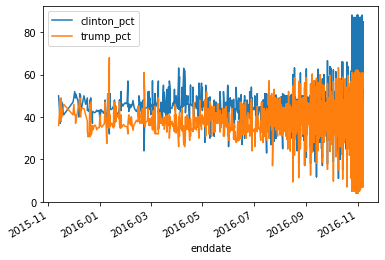

In [30]:
polls.plot.line(x='enddate', y=['clinton_pct','trump_pct'])

### Save DataFrame as pickle file

In [31]:
polls.to_pickle('polls_clean.pkl')

### Read DataFrame from pickle file

In [32]:
polls=pd.read_pickle('polls_clean.pkl')
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,clinton_pct,trump_pct
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00
4211,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,6.087135,45.00,41.00
4212,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00


## Prepare the data

### Add columns for grouping and filtering

In [33]:
polls['voter_type'] = polls.population.replace(
    {'lv':'likely','rv':'registered'})
polls.drop(columns='population', inplace=True)

In [34]:
polls['gap'] = polls.clinton_pct - polls.trump_pct

In [35]:
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,likely,4.00
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,likely,2.34
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,likely,3.00
4211,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,6.087135,45.00,41.00,likely,4.00
4212,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,5.316449,47.00,43.00,registered,4.00


In [36]:
polls['state_gap'] = polls.groupby('state').gap.transform(func='mean')
polls.head(3)

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,likely,4.00,4.347514
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,likely,2.34,4.347514
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,likely,3.00,4.347514


In [37]:
polls['swing'] = (polls.state != 'U.S.') & (abs(polls.state_gap) < 7)
polls.head(3)

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap,swing
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,likely,4.00,4.347514,False
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,likely,2.34,4.347514,False
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,likely,3.00,4.347514,False


In [38]:
polls.query('swing == True')

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap,swing
4223,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,800.0,3.842234,39.00,46.00,likely,-7.0,-0.809538,True
4225,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,1255.0,3.789957,46.00,40.00,likely,6.0,6.929367,True
4226,North Carolina,2016-11-04,2016-11-06,Siena College,A,800.0,3.774139,44.00,44.00,likely,0.0,1.368729,True
4227,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,1200.0,3.752961,46.00,49.00,likely,-3.0,-4.512911,True
4228,Florida,2016-11-03,2016-11-06,Quinnipiac University,A-,884.0,3.718829,46.00,45.00,likely,1.0,1.575103,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,Florida,2016-06-08,2016-06-19,Quinnipiac University,A-,975.0,0.000000,42.00,36.00,registered,6.0,1.575103,True
8411,North Carolina,2016-08-26,2016-08-27,Public Policy Polling,B+,1177.0,0.000000,45.00,44.00,likely,1.0,1.368729,True
8412,North Carolina,2016-03-09,2016-03-10,SurveyUSA,A,1576.0,0.000000,42.00,49.00,likely,-7.0,1.368729,True
8413,North Carolina,2016-07-31,2016-08-02,SurveyUSA,A,400.0,0.000000,42.00,46.00,likely,-4.0,1.368729,True


In [39]:
polls.loc[polls.swing == True]

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap,swing
4223,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,800.0,3.842234,39.00,46.00,likely,-7.0,-0.809538,True
4225,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,1255.0,3.789957,46.00,40.00,likely,6.0,6.929367,True
4226,North Carolina,2016-11-04,2016-11-06,Siena College,A,800.0,3.774139,44.00,44.00,likely,0.0,1.368729,True
4227,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,1200.0,3.752961,46.00,49.00,likely,-3.0,-4.512911,True
4228,Florida,2016-11-03,2016-11-06,Quinnipiac University,A-,884.0,3.718829,46.00,45.00,likely,1.0,1.575103,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,Florida,2016-06-08,2016-06-19,Quinnipiac University,A-,975.0,0.000000,42.00,36.00,registered,6.0,1.575103,True
8411,North Carolina,2016-08-26,2016-08-27,Public Policy Polling,B+,1177.0,0.000000,45.00,44.00,likely,1.0,1.368729,True
8412,North Carolina,2016-03-09,2016-03-10,SurveyUSA,A,1576.0,0.000000,42.00,49.00,likely,-7.0,1.368729,True
8413,North Carolina,2016-07-31,2016-08-02,SurveyUSA,A,400.0,0.000000,42.00,46.00,likely,-4.0,1.368729,True


### Melt the data

In [40]:
polls_long = polls.melt(
    id_vars=['state','enddate','voter_type','state_gap','swing'],
    value_vars=['clinton_pct','trump_pct'],
    var_name='candidate',
    value_name='percent')
polls_long.head(3)

,state,enddate,voter_type,state_gap,swing,candidate,percent
0,U.S.,2016-11-06,likely,4.347514,False,clinton_pct,47.00
1,U.S.,2016-11-07,likely,4.347514,False,clinton_pct,38.03
2,U.S.,2016-11-06,likely,4.347514,False,clinton_pct,42.00


### Clean up strings in candidate column

In [41]:
polls_long['candidate'] = polls_long.candidate.str.replace('_pct','').str.title()
polls_long.head(3)

,state,enddate,voter_type,state_gap,swing,candidate,percent
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00


### Use Seaborn to take an early plot of the long data

<AxesSubplot:xlabel='enddate', ylabel='percent'>

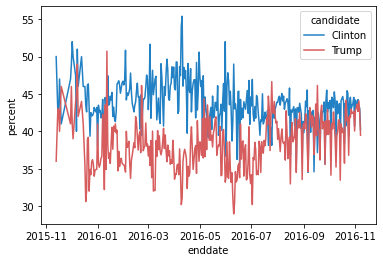

In [42]:
# Seaborn automatically averages the percentages for each day.
# With Pandas.plot(), you would need to calculate that average for each day from your data.

colors = ['#2281c4','#d75c5d']  # blue and red
sns.set_palette(sns.color_palette(colors))

sns.lineplot(data=polls_long, x='enddate', y='percent', 
             hue='candidate', ci=None)

### Add monthly bins to the DataFrame

In [43]:
import datetime as dt
dates = pd.date_range('10/01/2015', '12/01/2016', freq='M')
bin_labels = [dt.datetime.strftime(x, '%b %Y') for x in dates[1:]]
monthly_bins = pd.cut(x=polls_long.enddate, bins=dates, labels=bin_labels)
polls_long['month_bin'] = monthly_bins
polls_long.head()

,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00,Nov 2016
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00,Nov 2016


### Add an average percent column for each month

In [44]:
polls_long['month_pct_avg'] = polls_long.groupby(
    ['candidate','state','month_bin']).percent.transform(func='mean')
polls_long.head()

,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin,month_pct_avg
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016,45.067903
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016,45.067903
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016,45.067903
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00,Nov 2016,45.067903
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00,Nov 2016,45.067903


### Save DataFrames as pickle files

In [45]:
polls.to_pickle('polls_prepared.pkl')
polls_long.to_pickle('polls_long.pkl')

## Analyze the data

#### **Read DataFrames from pickle files**

In [46]:
polls = pd.read_pickle('polls_prepared.pkl')
polls_long = pd.read_pickle('polls_long.pkl')

In [47]:
polls_long.head(3)

,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin,month_pct_avg
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016,45.067903
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016,45.067903
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016,45.067903


### Plot national and swing state polls

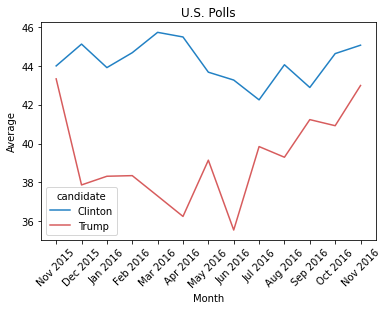

In [48]:
colors = ['#2281c4','#d75c5d']  # blue and red
sns.set_palette(sns.color_palette(colors))

ax = sns.lineplot(data=polls_long.query('state == "U.S."'), 
    x='month_bin', y='month_pct_avg', hue='candidate', ci=None)

ax.set(title='U.S. Polls', xlabel='Month', ylabel='Average')
ax.tick_params('x', labelrotation=45)

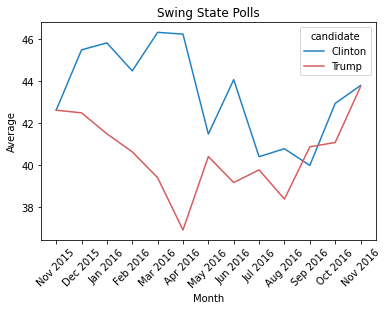

In [49]:
ax = sns.lineplot(data=polls_long.query('swing == True'), 
    x='month_bin', y='month_pct_avg', hue='candidate', ci=None)

ax.set(title='Swing State Polls', xlabel='Month', ylabel='Average')
ax.tick_params('x', labelrotation=45)

### Analyze the swing state results by voter type

In [50]:
polls_grouped = polls_long.query('swing == True') \
               .groupby(['voter_type','candidate'])

In [51]:
polls_grouped.percent.agg(['mean','std']).unstack(level='candidate').head()

mean                  std          
candidate     Clinton      Trump   Clinton     Trump
voter_type                                          
likely      42.339206  41.223044  4.672971  5.497081
registered  42.771795  40.431624  4.433704  4.564361

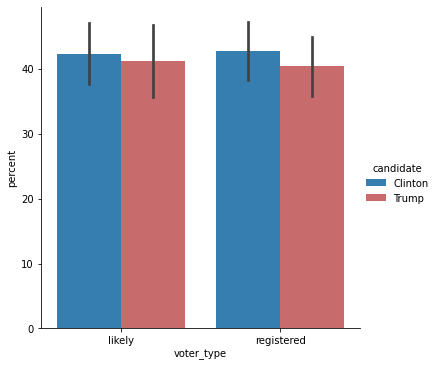

In [52]:
sns.catplot(data=polls_long.query('swing == True'), kind='bar',
    x='voter_type', y='percent', hue='candidate', ci='sd')

### Plot the last two months in all states

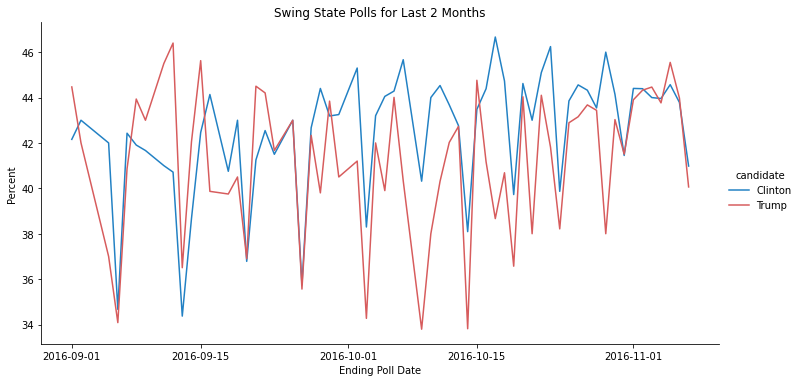

In [53]:
g = sns.relplot(data=polls_long.query('voter_type == "likely" \
        & swing == True & enddate >= "2016-09-01"'), 
    kind='line', x='enddate', y='percent', 
    hue='candidate', ci=None, aspect=2)

for ax in g.axes.flat:
    ax.set(title='Swing State Polls for Last 2 Months',
           xlabel='Ending Poll Date', ylabel='Percent')

### Plot the last two months in some key swing states

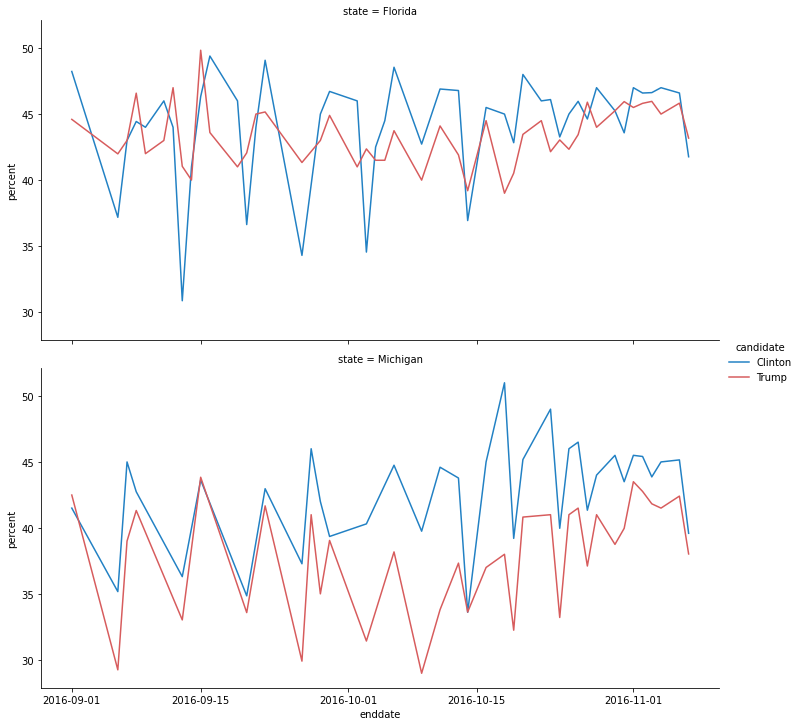

In [54]:
# We could plot more states such as:
# ["Wisconsin","Michigan","Ohio","Pennsylvania","Florida"] \

g = sns.relplot(data=polls_long.query('state in ["Michigan","Florida"] \
    & voter_type == "likely" & enddate >= "2016-09"'), 
    kind='line', x='enddate', y='percent', hue='candidate', ci=None, 
    col='state', col_wrap=1, aspect=2)

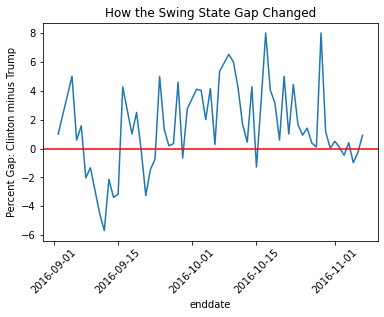

In [55]:
# NOTE: This plot is not presented in the book.

# restore default color palette
sns.set_palette(sns.color_palette('tab10')) 

ax = sns.lineplot(data=polls.query('swing == True \
    & enddate > "2016-09-01"'),
    x='enddate', y='gap', ci=None)

ax.tick_params('x', labelrotation=45)
ax.set(title='How the Swing State Gap Changed', 
       ylabel='Percent Gap: Clinton minus Trump')
ax.axhline(0, c='red')

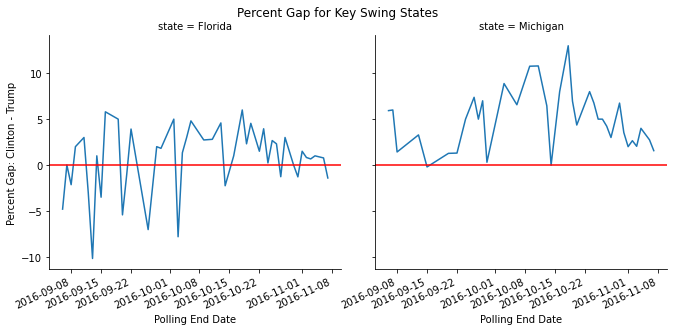

In [56]:
# restore default color palette
sns.set_palette(sns.color_palette('tab10')) 

# create the plot
g = sns.relplot(data=polls.query('state==["Michigan", "Florida"] \
        & enddate > "2016-09"'),
    kind="line", x='enddate', y='gap', ci=None, 
    col='state', col_wrap=2)

# enhance the formatting of the plot
g.fig.suptitle('Percent Gap for Key Swing States')
g.fig.subplots_adjust(top=0.9, bottom=0.25, left=0.1)   # adjust sides to fit titles and labels
g.set_xticklabels(rotation=25, horizontalalignment='right')
g.set(xlabel="Polling End Date", 
      ylabel="Percent Gap: Clinton - Trump")
for ax in g.axes.flat:
    ax.axhline(0, c='red')

# save the plot
g.fig.savefig('swing_state_gap_line.png')

### Prepare the gap data for the week before the election

In [57]:
# prepare the gap data for 8 swing states
polls_gap = polls.query('state==["Wisconsin", "Arizona", \
    "Pennsylvania","Nevada","Iowa","Florida","North Carolina","Ohio"] \
    & enddate > "2016-11-01"')[['state','gap']]
polls_gap = polls_gap.groupby('state').mean()
polls_gap

,gap
state,
Arizona,-1.376923
Florida,0.573500
Iowa,-4.243846
Nevada,0.413529
North Carolina,2.471176
Ohio,-1.652632
Pennsylvania,2.608571
Wisconsin,4.712308


In [58]:
polls_gap['advantage'] = polls_gap.apply(
    lambda row: 'Clinton' if row.gap > 0 else 'Trump', axis=1)
polls_gap['gap'] = abs(polls_gap.gap)
polls_gap = polls_gap.reset_index()
polls_gap

,state,gap,advantage
0,Arizona,1.376923,Trump
1,Florida,0.573500,Clinton
2,Iowa,4.243846,Trump
3,Nevada,0.413529,Clinton
4,North Carolina,2.471176,Clinton
5,Ohio,1.652632,Trump
6,Pennsylvania,2.608571,Clinton
7,Wisconsin,4.712308,Clinton


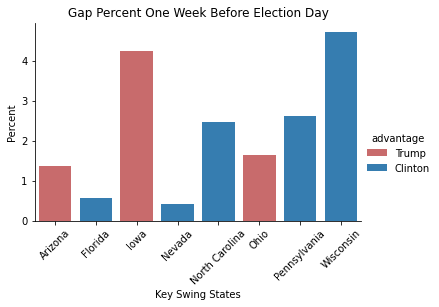

In [59]:
# set custom color palette
colors = ['#d75c5d','#2281c4']  # red and blue
sns.set_palette(sns.color_palette(colors))

# create the plot
g = sns.catplot(data=polls_gap,  kind='bar', x='state', y='gap',
                hue='advantage', dodge=False)

# NOTE: The dodge parameter fixes a formatting problem that's caused by the hue parameter.
# I found this solution by searching the internet after the bars were unevenly spaced.

# format the plot
for ax in g.axes.flat:
    ax.tick_params('x', labelrotation=45)    
    ax.set(title='Gap Percent One Week Before Election Day', 
           xlabel='Key Swing States', 
           ylabel='Percent')
    
# save the plot
g.fig.subplots_adjust(top=0.90)     # adjust the top to fit the title
g.fig.subplots_adjust(bottom=0.35)  # adjust the bottom to fix the y labels
g.fig.savefig('swing_state_gap_bar.png')

### Create a heat map that shows how states changed over time

In [60]:
polls_heat = polls[['state','enddate','samplesize',
                    'clinton_pct','trump_pct','swing']].copy()
polls_heat = polls_heat.query('swing == True')

In [61]:
polls_heat['clinton_count'] = polls_heat.samplesize * polls_heat.clinton_pct
polls_heat['trump_count'] = polls_heat.samplesize * polls_heat.trump_pct

In [62]:
polls_heat = polls_heat[['state','clinton_count','trump_count','enddate']]

In [63]:
dates = pd.date_range('09/01/2016', '11/13/2016', freq='w')
bin_labels = [dt.datetime.strftime(x, '%d %b') for x in dates[1:]]
weekly_bins = pd.cut(x=polls_heat.enddate, bins=dates, labels=bin_labels)
polls_heat['weekly_bin'] = weekly_bins
polls_heat.head(3)

,state,clinton_count,trump_count,enddate,weekly_bin
4223,Iowa,31200.0,36800.0,2016-11-04,06 Nov
4225,Wisconsin,57730.0,50200.0,2016-10-31,06 Nov
4226,North Carolina,35200.0,35200.0,2016-11-06,06 Nov


In [64]:
polls_heat = polls_heat.groupby(['state','weekly_bin']).sum().fillna(0)

In [65]:
polls_heat['gap'] = ((polls_heat.clinton_count - polls_heat.trump_count) / 
                  (polls_heat.clinton_count + polls_heat.trump_count)) * 100
polls_heat = polls_heat[['gap']].fillna(0).round(1)

In [66]:
polls_heat = polls_heat.unstack(level='weekly_bin')
polls_heat = polls_heat.droplevel(level=0, axis=1)
polls_heat.head(3)

weekly_bin,11 Sep,18 Sep,25 Sep,02 Oct,09 Oct,16 Oct,23 Oct,30 Oct,06 Nov,13 Nov
state,,,,,,,,,,
Arizona,-3.0,-4.7,-0.6,0.8,0.9,0.6,5.1,-0.3,-1.4,4.0
Colorado,5.7,2.1,1.3,7.8,6.4,9.5,7.3,7.0,4.5,7.0
Florida,-1.9,-4.3,-3.0,0.5,0.8,2.3,3.5,1.9,0.9,0.3


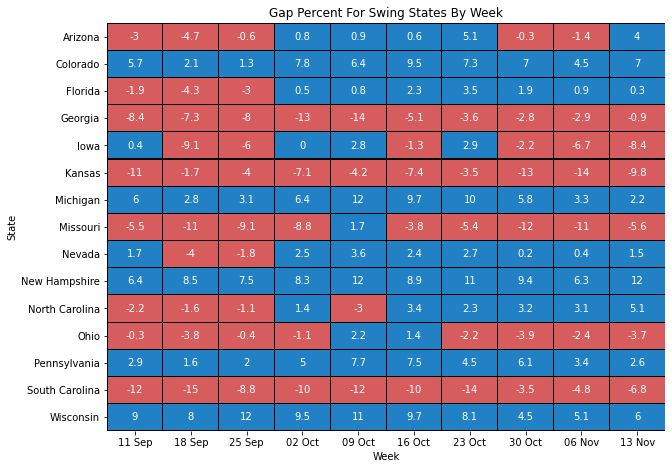

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7.5))

# create the plot
sns.heatmap(polls_heat, cmap=['#d75c5d','#2281c4'], center=0, 
            annot=True, linewidths=0.01, linecolor='black', cbar=False)

# format the plot
ax.set(title='Gap Percent For Swing States By Week', 
       xlabel='Week', ylabel='State')

# save the figure
fig.savefig('swing_state_gap_heat_map.png')